Autor: Gabriel de Sousa Botelho

Formação: Cientista da Computação pela UFC

Contato:
  
  📧 gabrielsbotelho12@gmail.com
  
  👉 [LinkedIn](https://www.linkedin.com/in/gabriel-botelhoo/)
  
  👉 [Github](https://github.com/GabrielSBotelho)

**Sumário**

* Importar bibliotecas
* Importar dados
* Processando os dados
* Preparar dados para modelo de ML 
  * Transformar variáveis categóricas
  * Padronizar os dados
* Dividir os dados em treino e teste
* Criar modelo e treinar
* Avaliar Performance

## Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix

## Importing Data

In [2]:
path = '/content/drive/MyDrive/Data Science/Dados/Heart Deasease/heart_2020_cleaned.csv'
dataset = pd.read_csv(path)

In [3]:
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
print(f'Número de linhas: {dataset.shape[0]}')
print(f'Número de colunas: {dataset.shape[1]}')

Número de linhas: 319795
Número de colunas: 18


In [5]:
# Verificando se existe algum valor faltante
dataset.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [6]:
# Verificando os tipos de cada variável
dataset.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

## Data Preparation

In [7]:
# Subistituindo valores categóricos por 0 e 1
dataset = dataset[dataset.columns].replace({
    'Yes': 1,
    'Yes (during pregnancy)': 1,
    'No': 0,
    'No, borderline diabetes': 0,
    'Male': 1,
    'Female': 0
})

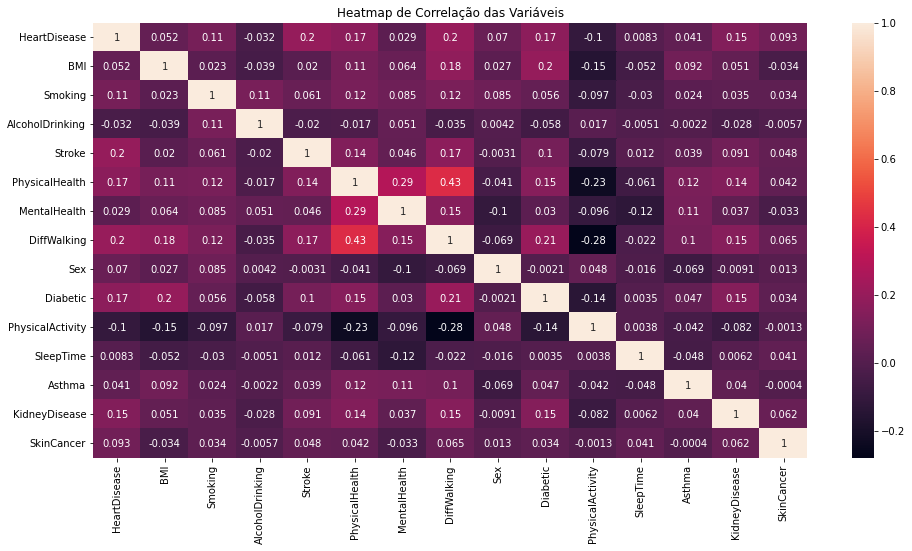

In [8]:
corr = dataset.corr()

plt.figure(figsize=(16,8))
plt.title('Heatmap de Correlação das Variáveis')
sns.heatmap(corr, annot=True)

In [9]:
dataset.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
AgeCategory          object
Race                 object
Diabetic              int64
PhysicalActivity      int64
GenHealth            object
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
dtype: object

In [10]:
# Selecionando as colunas restantes do tipo 'Object' 
object_columns = list(dataset.select_dtypes(include='object').columns)
object_columns

['AgeCategory', 'Race', 'GenHealth']

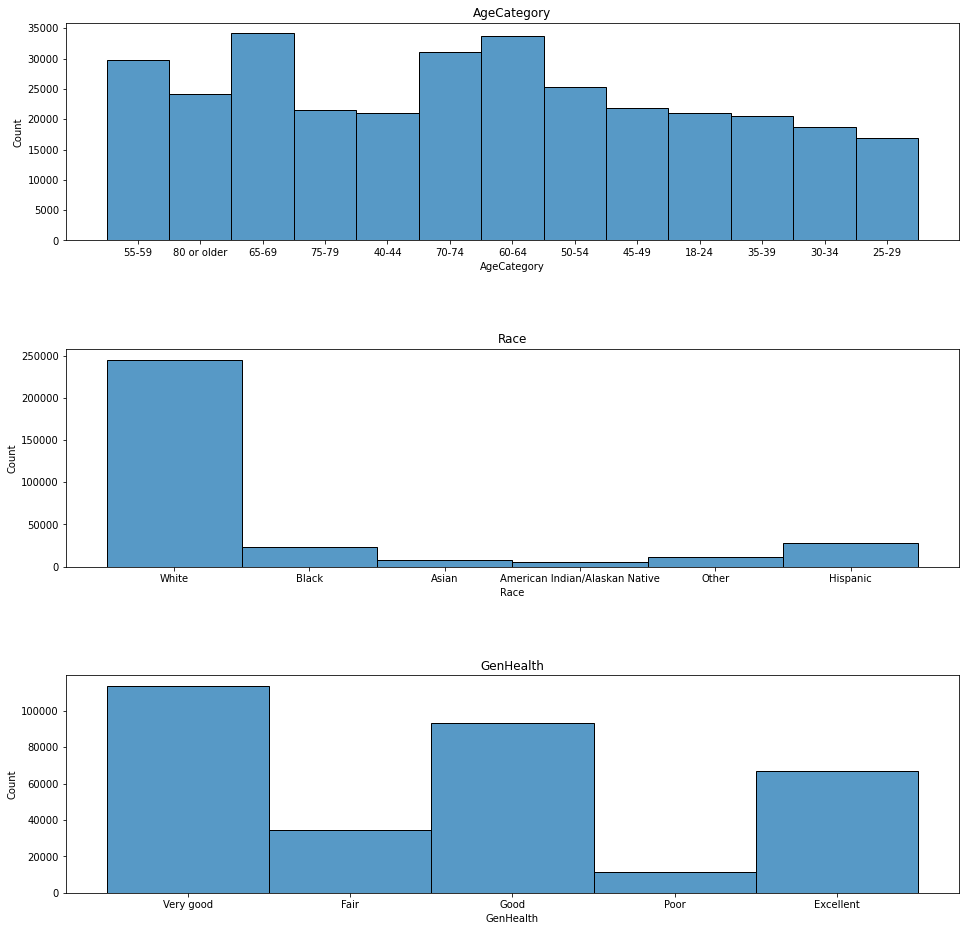

In [11]:
# Plot da distribuição dos valores de cada variável catgórica
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(16,16))
fig.subplots_adjust(hspace=0.5)

for ax, name in zip(axes.flatten(), object_columns):
    sns.histplot(dataset[name], ax=ax).set(title=name)

## Enconding Categorical Variables

In [23]:
# Criando objeto encoder para varáveis categóricas
enc = OneHotEncoder()

# Armazenando os valores transformados em um novo dataframe
encoded = pd.DataFrame(enc.fit_transform(dataset[object_columns]).toarray())
encoded.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [24]:
print(f'Número de linhas: {encoded.shape[0]}')
print(f'Número de colunas: {encoded.shape[1]}')

Número de linhas: 319795
Número de colunas: 24


In [25]:
# Criando cópia do dataset original sem as varáveis categóricas
data = dataset.drop(columns=object_columns)

# Concatenando os dataframe com os dados categóricos transformados
# ao dataframe principal
data = pd.concat([data, encoded], axis=1)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,14,15,16,17,18,19,20,21,22,23
0,0,16.60,1,0,0,3.0,30.0,0,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0,20.34,0,0,1,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,26.58,1,0,0,20.0,30.0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0,24.21,0,0,0,0.0,0.0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0,23.71,0,0,0,28.0,0.0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [26]:
print(f'Número de linhas: {data.shape[0]}')
print(f'Número de colunas: {data.shape[1]}')

Número de linhas: 319795
Número de colunas: 39


## Splitting The Data

In [27]:
X = data.drop('HeartDisease', axis=1).values
y = data['HeartDisease'].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
print(f'Shape x_train: {x_train.shape}')
print(f'Shape y_train: {y_train.shape}\n')
print(f'Shape x_test: {x_test.shape}')
print(f'Shape y_test: {y_test.shape}')

Shape x_train: (223856, 38)
Shape y_train: (223856,)

Shape x_test: (95939, 38)
Shape y_test: (95939,)


## Standardizing Data

In [30]:
# Criando objeto standard scaler
scaler = StandardScaler()

# Treinando e transformando os dados de treino e teste
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

## Model

In [31]:
KNN = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
KNN.fit(x_train_scl, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4)

In [32]:
y_pred = KNN.predict(x_test_scl)

In [33]:
print(f'Acurácia: {accuracy_score(y_test, y_pred)}')
print(f'Erro Absoluto Médio: {mean_absolute_error(y_test, y_pred)}')
print(f'Matriz de Confusão: \n{confusion_matrix(y_test,y_pred)}')

Acurácia: 0.9094111883592699
Erro Absoluto Médio: 0.09058881164073004
Matriz de Confusão: 
[[86554  1095]
 [ 7596   694]]
